## Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/train_clean.csv')
df_test = pd.read_csv('../datasets/test_clean.csv')

df.drop(columns=['Unnamed: 0'], inplace=True)
df_test.drop(columns=['Unnamed: 0'], inplace=True)

#allows me to scroll (Credit to Andy)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [3]:
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold,neighborhood_rank
0,725,754,0,None,3,1Fam,3,No,0.0,0.0,3,192.0,533.0,0.0,GLQ,Unf,Y,1,2,SBrkr,0,3,4,HdBoard,Plywood,None,0,0,CBlock,2,7,475.0,2.0,3,RFn,3,Attchd,1976.0,1479,1,GasA,5,2Story,109,1,4,Lvl,Gtl,13517,CulDSac,68.0,IR1,0,60,RL,289.0,BrkFace,None,0,3,Sawyer,44,8,6,533352170,Y,0,1,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010,9
1,913,1209,0,None,4,1Fam,3,No,1.0,0.0,4,276.0,637.0,0.0,GLQ,Unf,Y,2,2,SBrkr,0,3,4,VinylSd,VinylSd,None,3,1,PConc,2,7,559.0,2.0,3,RFn,3,Attchd,1997.0,2122,1,GasA,5,2Story,544,1,4,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,None,0,4,SawyerW,74,5,7,531379050,Y,0,1,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009,14
2,1057,0,0,None,3,1Fam,3,No,1.0,0.0,3,326.0,731.0,0.0,GLQ,Unf,Y,2,2,SBrkr,0,4,3,VinylSd,VinylSd,None,0,0,CBlock,1,7,246.0,1.0,3,Unf,3,Detchd,1953.0,1057,0,GasA,3,1Story,153,1,4,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,None,0,1,NAmes,52,7,5,535304180,Y,0,1,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,12
3,744,700,0,None,3,1Fam,3,No,0.0,0.0,4,384.0,0.0,0.0,Unf,Unf,Y,2,2,SBrkr,0,3,3,VinylSd,VinylSd,None,0,0,PConc,2,7,400.0,2.0,3,Fin,3,BuiltIn,2007.0,1444,1,GasA,4,2Story,318,1,3,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,None,0,4,Timber,0,5,5,916386060,Y,0,1,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010,23
4,831,614,0,None,3,1Fam,4,No,0.0,0.0,2,676.0,0.0,0.0,Unf,Unf,Y,2,2,SBrkr,0,3,3,Wd Sdng,Plywood,None,0,0,PConc,2,7,484.0,2.0,3,Unf,3,Detchd,1957.0,1445,0,GasA,3,1.5Fin,255,1,3,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,None,0,3,SawyerW,59,8,6,906425045,N,0,1,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010,14


In [4]:
df['bsmt_num'] = df['bsmt_cond'] * df['bsmt_qual']

df['fireplace'] = df['fireplaces'] * df['fireplace_qu']

df['exter_num'] = df['exter_cond'] * df['exter_qual']

df['baths'] = df['full_bath'] + (0.5 * df['half_bath']) + df['bsmt_full_bath'] + (0.5 * df['bsmt_half_bath'])

df['yr_remod_or_built'] = df['year_remod/add'] * df['year_built']

df['garage_space'] = df['garage_area'] * df['garage_cars']

df['sqft_above'] = df['1st_flr_sf'] * df['gr_liv_area']
df['overall_qual_gr_liv_area'] = df['overall_qual'] * df['gr_liv_area']
df['1st_flr_and_total_bsmt_sqft'] = df['1st_flr_sf'] * df['total_bsmt_sf']
df['1st_flr_gr_liv_area_total_bsmt_sqft'] = df['1st_flr_sf'] * df['total_bsmt_sf'] * df['gr_liv_area']

df['deck_or_porch'] = df['wood_deck_sf'] * df['open_porch_sf'] * df['enclosed_porch'] * df['3ssn_porch'] * df['screen_porch']

df['condition_rank'] = df['condition_1'] * df['condition_2']

df = pd.get_dummies(df, columns=['ms_zoning'], drop_first=True)
mszone_dum = [col for col in df.columns if 'ms_zoning' in col]

In [5]:
df_test['bsmt_num'] = df_test['bsmt_cond'] * df_test['bsmt_qual']

df_test['fireplace'] = df_test['fireplaces'] * df_test['fireplace_qu']

df_test['exter_num'] = df_test['exter_cond'] * df_test['exter_qual']

df_test['baths'] = df_test['full_bath'] + (0.5 * df_test['half_bath']) + df_test['bsmt_full_bath'] + (0.5 * df_test['bsmt_half_bath'])

df_test['yr_remod_or_built'] = df_test['year_remod/add'] * df_test['year_built']

df_test['garage_space'] = df_test['garage_area'] * df_test['garage_cars']

df_test['sqft_above'] = df_test['1st_flr_sf'] * df_test['gr_liv_area']
df_test['overall_qual_gr_liv_area'] = df_test['overall_qual'] * df_test['gr_liv_area']
df_test['1st_flr_and_total_bsmt_sqft'] = df_test['1st_flr_sf'] * df_test['total_bsmt_sf']
df_test['1st_flr_gr_liv_area_total_bsmt_sqft'] = df_test['1st_flr_sf'] * df_test['total_bsmt_sf'] * df_test['gr_liv_area']

df_test['deck_or_porch'] = df_test['wood_deck_sf'] * df_test['open_porch_sf'] * df_test['enclosed_porch'] * df_test['3ssn_porch'] * df_test['screen_porch']

df_test['condition_rank'] = df_test['condition_1'] * df_test['condition_2']

df_test = pd.get_dummies(df_test, columns=['ms_zoning'], drop_first=True)
df_test['ms_zoning_C (all)'] = 0

<AxesSubplot:>

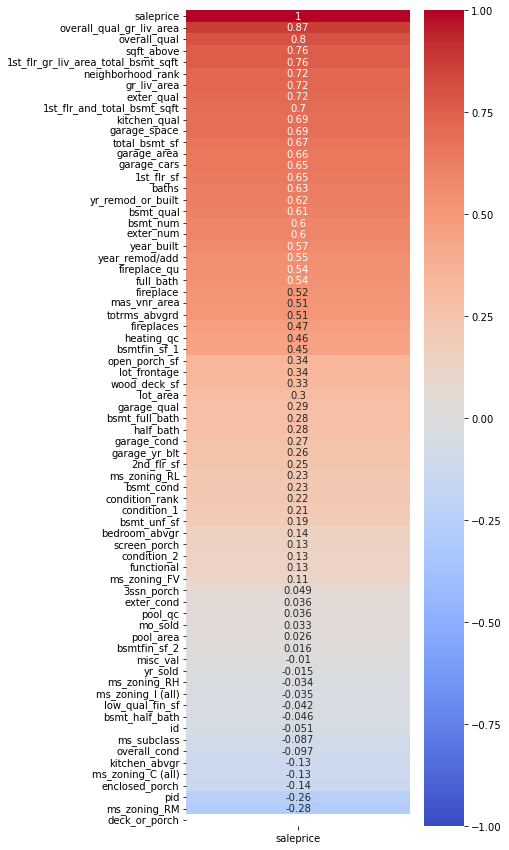

In [6]:
plt.figure(figsize = (5, 15))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice', ascending = False), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

In [7]:
train_featengin = df
test_featengin = df_test

In [8]:
train_featengin.to_csv('../datasets/train_featengin.csv') 
test_featengin.to_csv('../datasets/test_featengin.csv') 

In [9]:
df.dtypes

1st_flr_sf                               int64
2nd_flr_sf                               int64
3ssn_porch                               int64
alley                                   object
bedroom_abvgr                            int64
bldg_type                               object
bsmt_cond                                int64
bsmt_exposure                           object
bsmt_full_bath                         float64
bsmt_half_bath                         float64
bsmt_qual                                int64
bsmt_unf_sf                            float64
bsmtfin_sf_1                           float64
bsmtfin_sf_2                           float64
bsmtfin_type_1                          object
bsmtfin_type_2                          object
central_air                             object
condition_1                              int64
condition_2                              int64
electrical                              object
enclosed_porch                           int64
exter_cond   